In [2]:
import pandas as pd
import numpy as np
import torch
import itertools

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [4]:
from attention_model import AttentionTrainer, AttentionAggregator

In [5]:
df = pd.read_csv("/content/drive/MyDrive/merged/merged_data.csv")

In [6]:
sent_cols = ['textblob_score', 'vader_score', 'finbert_score', 'llm_score']
target_col = 'Target'
df['prev_return_1'] = df[target_col].shift(1).fillna(0)
df['prev_return_2'] = df[target_col].shift(2).fillna(0)
sent_cols += ['prev_return_1', 'prev_return_2']

In [7]:
trainer = AttentionTrainer(sent_cols=sent_cols,lr=0.003, epochs=100)
trainer.prepare_data(df, target_col)

In [8]:
trainer.train()

Epoch [5/100]  Loss: 0.3627
Epoch [10/100]  Loss: 0.1776
Epoch [15/100]  Loss: 0.1727
Epoch [20/100]  Loss: 0.1726
Epoch [25/100]  Loss: 0.1680
Epoch [30/100]  Loss: 0.1585
Epoch [35/100]  Loss: 0.1608
Epoch [40/100]  Loss: 0.1579
Epoch [45/100]  Loss: 0.1569
Epoch [50/100]  Loss: 0.1555
Epoch [55/100]  Loss: 0.1561
Epoch [60/100]  Loss: 0.1585
Epoch [65/100]  Loss: 0.1562
Epoch [70/100]  Loss: 0.1526
Epoch [75/100]  Loss: 0.1508
Epoch [80/100]  Loss: 0.1552
Epoch [85/100]  Loss: 0.1492
Epoch [90/100]  Loss: 0.1517
Epoch [95/100]  Loss: 0.1508
Epoch [100/100]  Loss: 0.1538


In [9]:
preds, attn = trainer.evaluate()

Validation Accuracy: 0.9463


In [10]:
df, attn_matrix = trainer.add_attention_scores(df)

In [11]:
trainer.save_attention_csv(df)

CSV saved at: df_with_attention_scores.csv


In [12]:
trainer.save_model()

Model weights saved at: attention_model_weights.pth


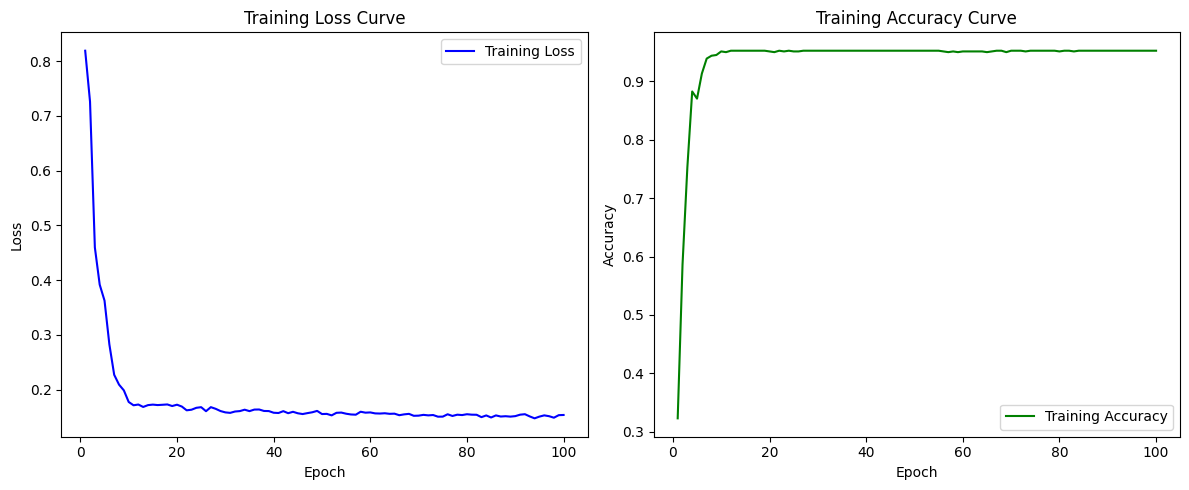

In [13]:
trainer.plot_metrics()